In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error

In [15]:
df=pd.read_excel('Cleaned.xlsx')

In [17]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [19]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

In [27]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
train_r2=r2_score(y_train,y_train_pred)
crossvalidation=cross_val_score(rf,X_train,y_train,cv=5,scoring='r2').mean()
print('train_r2:',train_r2)
print('crossvalidation:',crossvalidation)

train_r2: 0.9844251387066889
crossvalidation: 0.891595238829284


In [73]:
rf.feature_importances_

array([0.06668502, 0.89536487, 0.02268166, 0.00501585, 0.00559968,
       0.00465291])

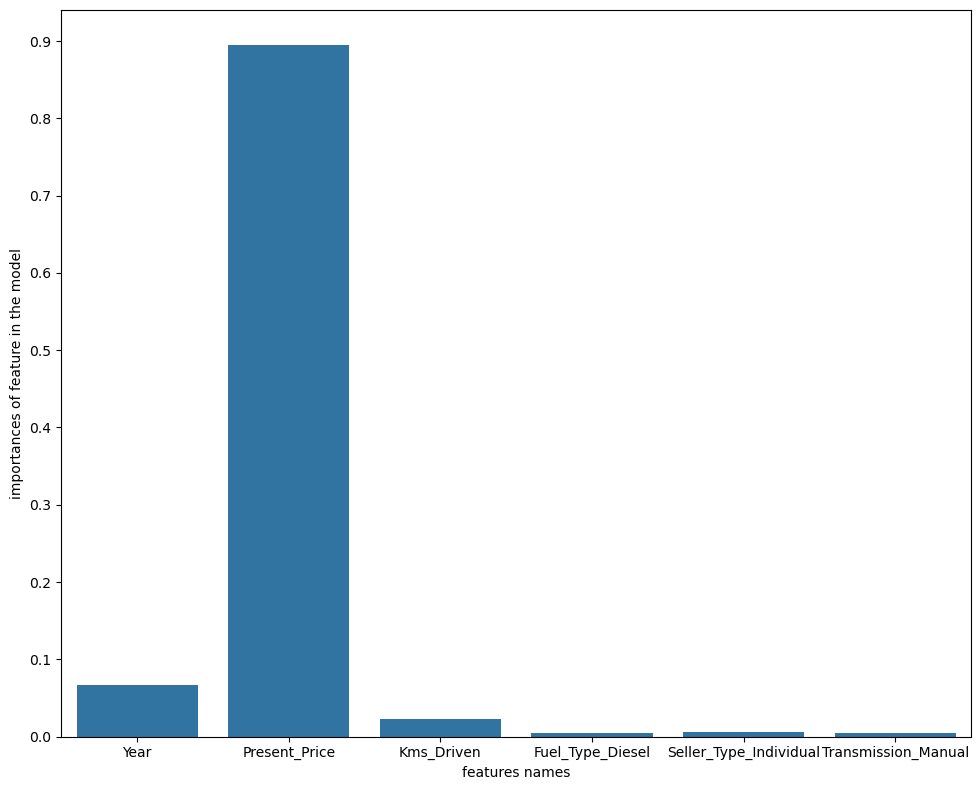

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=X.columns,y=rf.feature_importances_)
plt.xlabel('features names')
plt.ylabel('importances of feature in the model')
plt.yticks(np.arange(0.0,1,0.1))
plt.tight_layout()
plt.show()

In [28]:
y_test_pred=rf.predict(X_test)
train_r2=r2_score(y_test,y_test_pred)
print('train_r2:',train_r2)

train_r2: 0.9640935190637608


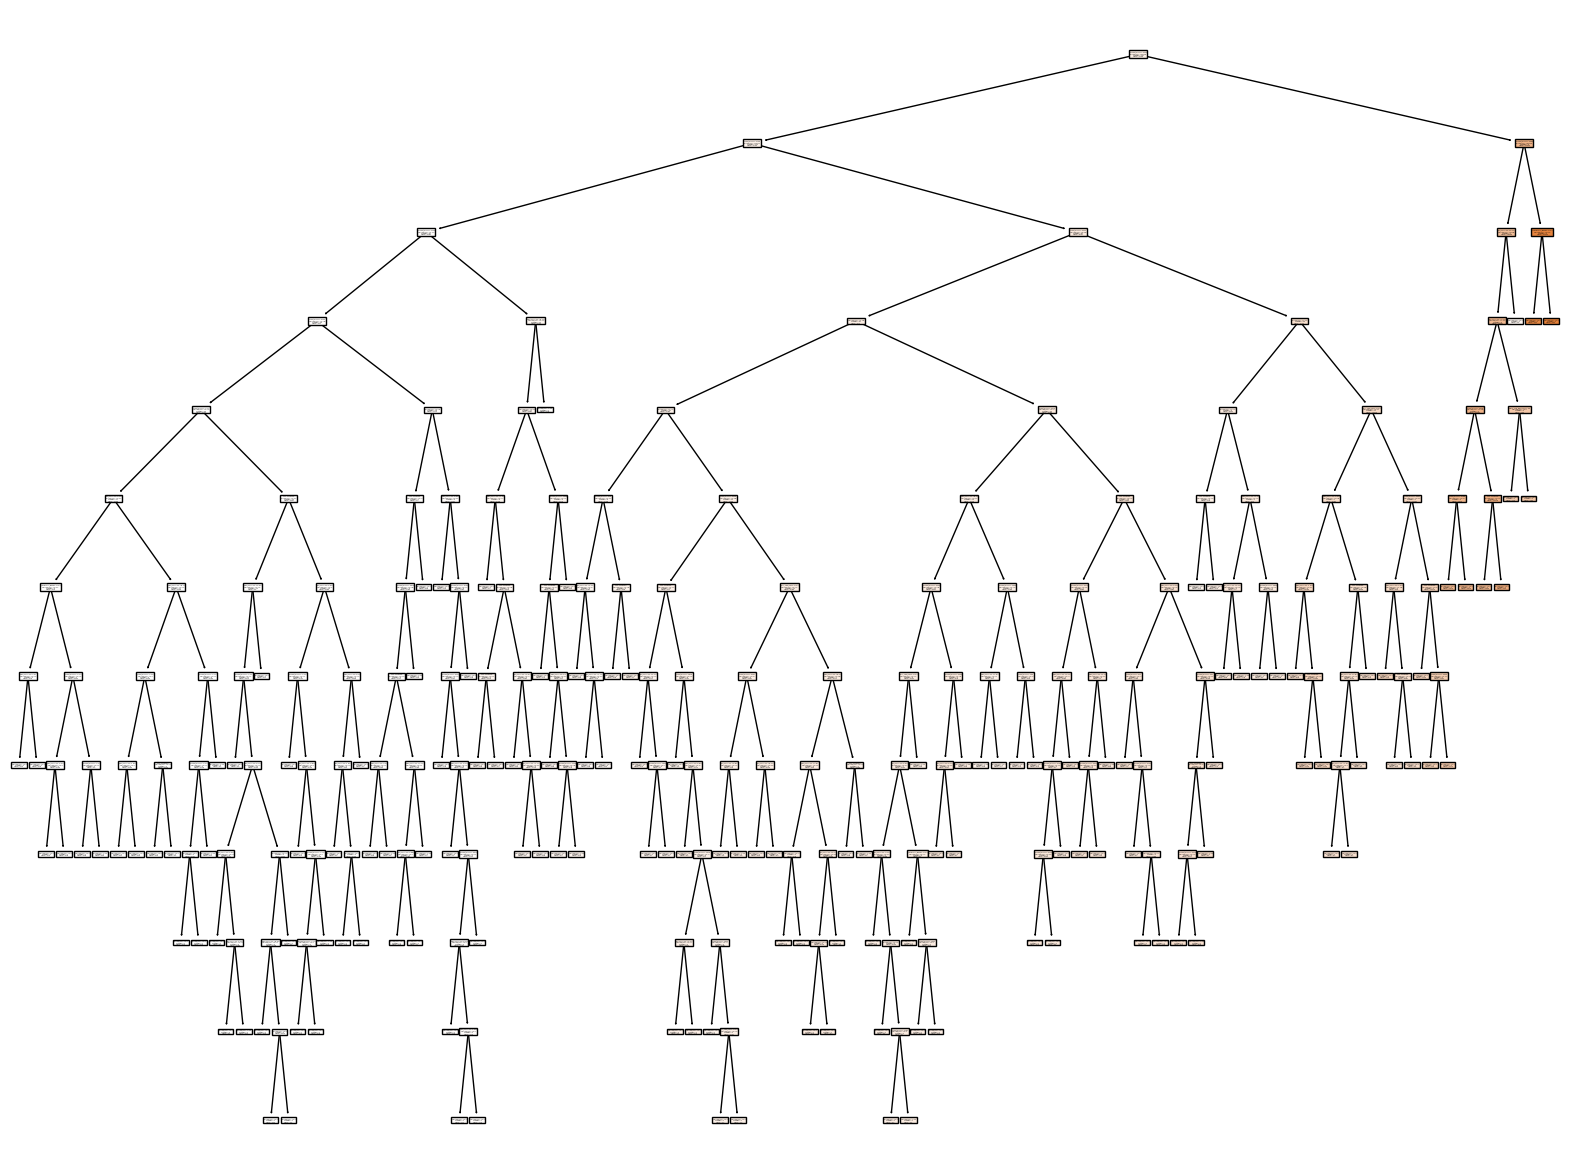

In [77]:
plt.figure(figsize=(20,15))
sns.barplot(x=X.columns,y=rf.feature_importances_)
plot_tree(rf[1],filled=True,feature_names=X.columns)
plt.show()